In [8]:
!pip install pytrends

#  we need to connect to Google as we are requesting the Google trending topics, so for this, we need to import the method TrendReq from pytrends.request library. Also, we will import matplotlib, to visualize the data.

In [11]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import time

Trending_topics = TrendReq(hl='en-US', tz=360)


## Build Payload## 
Now, we will be creating a dataframe of the top 10 countries that search for the term “CLOUD COMPUTING“. For this, we will be using the method build_payload, which allows storing a list of keywords that you want to search. In this, you can also specify the timeframe and the category to query the data from.  

In [15]:
kw_list=["Cloud Computing"]
Trending_topics.build_payload(kw_list,cat=0, timeframe='today 12-m')
time.sleep(5) # Wait for 5 seconds

### The interest_over_time() method, returns the historical, indexed data for when the specified keyword was most searched according to the timeframe mentioned in the build payload method.




In [18]:
data = Trending_topics.interest_over_time()
data = data.sort_values(by="Cloud Computing", ascending = False)
data = data.head(10)
print(data)

            Cloud Computing  isPartial
date                                  
2023-12-03              100      False
2023-12-10               90      False
2023-11-19               85      False
2023-11-26               84      False
2023-12-17               80      False
2024-01-28               80      False
2024-01-21               79      False
2024-02-18               78      False
2024-02-11               78      False
2024-05-19               77      False


C:\Users\vs691\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


In [20]:
kw_list = ["Cloud Computing"]
Trending_topics.build_payload(kw_list, cat=0, timeframe='2018-01-01 2018-02-01', geo='', gprop='')
data = Trending_topics.interest_over_time()
data = data.sort_values(by="Cloud Computing", ascending = False)
data = data.head(10)
print(data)

            Cloud Computing  isPartial
date                                  
2018-01-30              100      False
2018-02-01               98      False
2018-01-18               98      False
2018-01-08               96      False
2018-01-10               93      False
2018-01-04               93      False
2018-01-22               92      False
2018-01-24               92      False
2018-01-11               92      False
2018-01-09               90      False


In [22]:
data = Trending_topics.interest_by_region()
data = data.sort_values(by="Cloud Computing", 
                        ascending = False)
data = data.head(10)
print(data)


            Cloud Computing
geoName                    
Ethiopia                100
Cameroon                 54
Nepal                    45
India                    42
St. Helena               40
China                    39
Sri Lanka                24
Singapore                23
Kenya                    23
Lebanon                  22


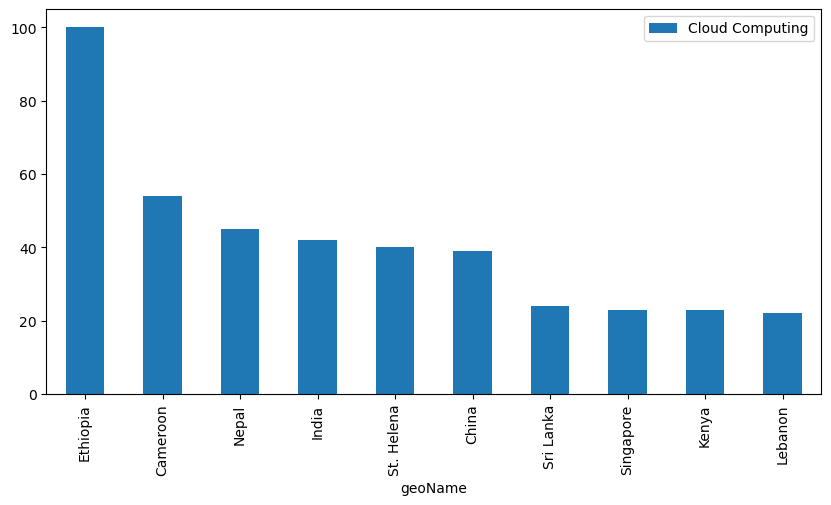

In [24]:
data.reset_index().plot(x='geoName', y='Cloud Computing',
                        figsize=(10,5), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()


In [26]:
df = Trending_topics.top_charts(2020, hl='en-US', 
                                tz=300, geo='GLOBAL')
df.head(10)

,title,exploreQuery
0,Coronavirus,
1,Election results,
2,Kobe Bryant,
3,Zoom,
4,IPL,
5,India vs New Zealand,
6,Coronavirus update,
7,Coronavirus symptoms,
8,Joe Biden,
9,Google Classroom,


In [28]:
try:
    Trending_topics.build_payload(kw_list=['Cloud Computing'])
    related_queries = Trending_topics.related_queries()
    related_queries.values()
except (KeyError, IndexError):
    print("No related queries found for 'Cloud Computing'")

No related queries found for 'Cloud Computing'


In [30]:
keywords = Trending_topics.suggestions(
  keyword='Cloud Computing')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid') 

,title,type
0,Cloud computing,Topic
1,Cloud computing,Topic
2,Cloud computing security,Topic
3,Alibaba Cloud,Computer software company
4,Private cloud computing infrastructure,Topic
